# Link of dataset
### https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [455]:
df = pd.read_csv('heart.csv')

In [456]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [458]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='output'>

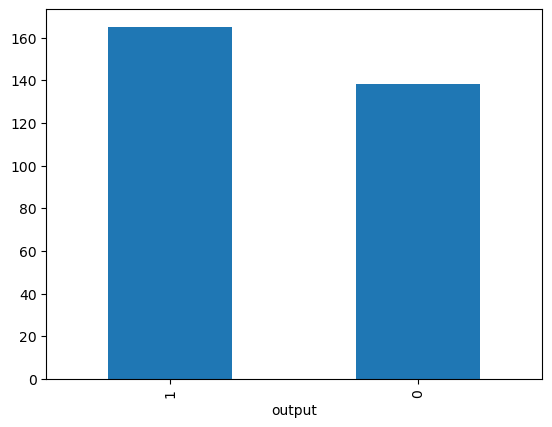

In [459]:
df['output'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

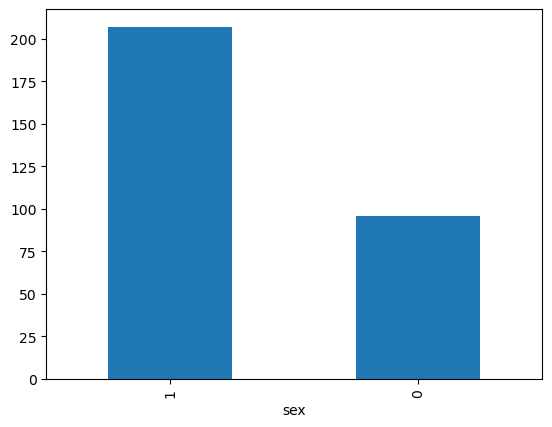

In [460]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='Count'>

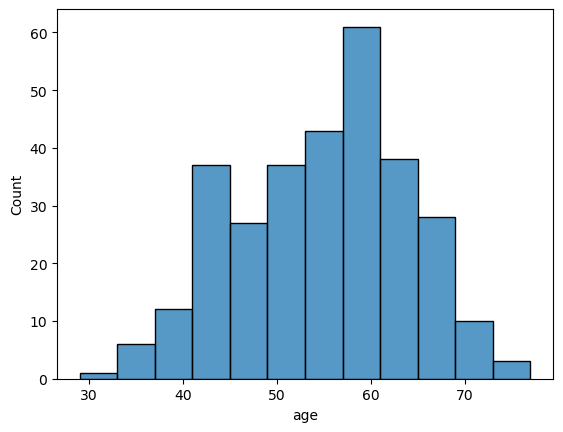

In [461]:
sns.histplot(x='age', data=df)

<Axes: >

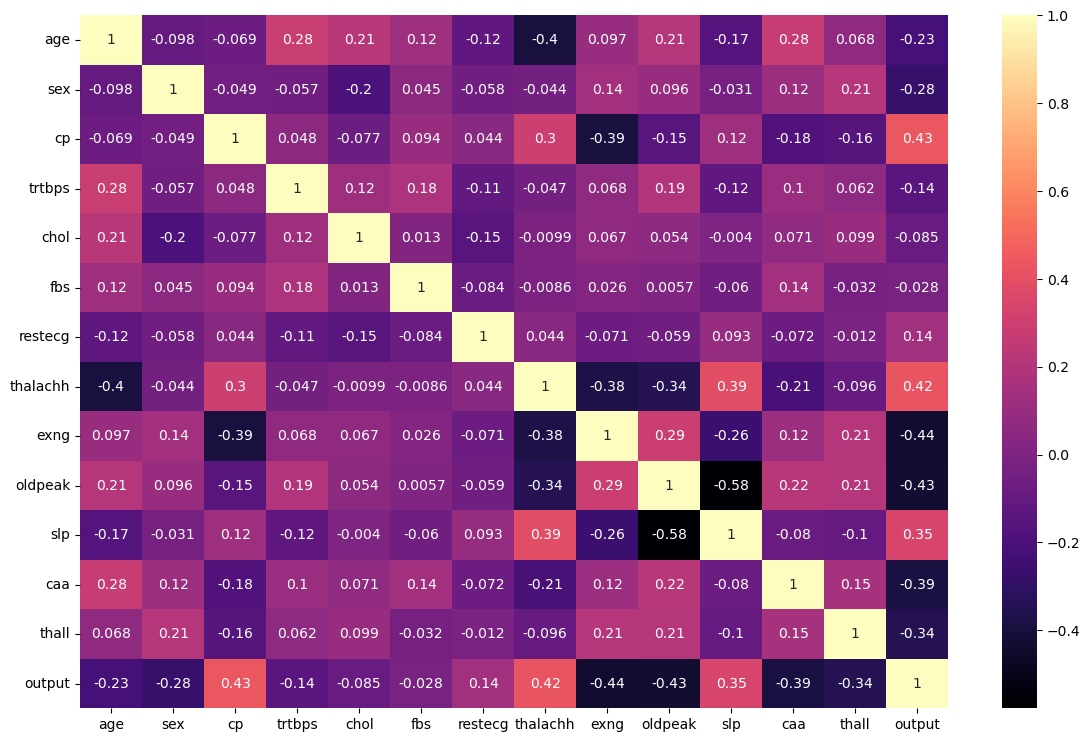

In [462]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma')

C:\Users\Abdul\AppData\Local\Temp\ipykernel_23428\1198603621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y='chol', data=df, palette='Set1')


<Axes: xlabel='output', ylabel='chol'>

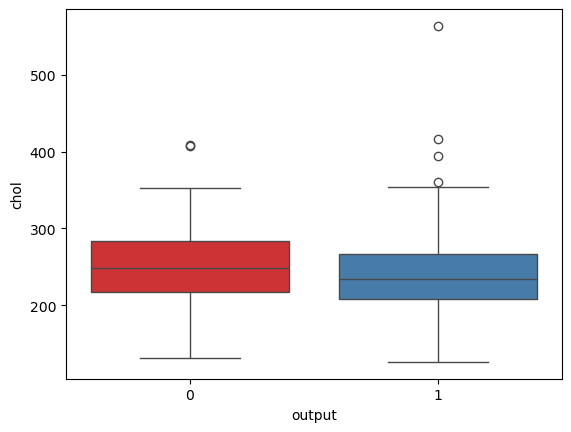

In [463]:
sns.boxplot(x='output', y='chol', data=df, palette='Set1')

<Axes: xlabel='chol', ylabel='Count'>

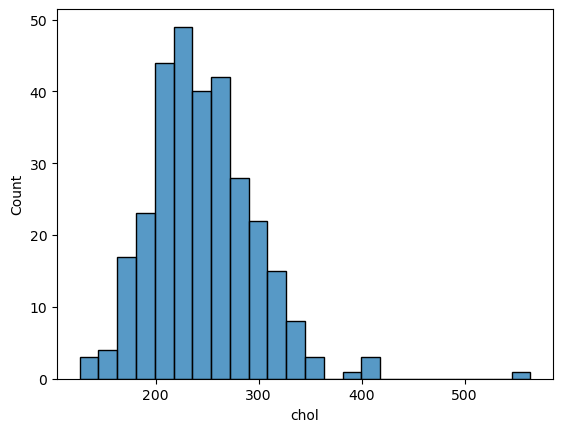

In [464]:
sns.histplot(x='chol', data=df)

In [465]:
df[df['chol']> 500]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


## Data PreProcessing

In [466]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [467]:
from sklearn.model_selection import train_test_split
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [468]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [469]:
X_train = scaler.fit_transform(X_train)

In [470]:
X_test = scaler.transform(X_test)

In [471]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [472]:
model = Sequential()

In [473]:
model.add(Dense(14, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(7, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [474]:
earlyStopping = EarlyStopping(patience=4)

In [475]:
model.fit(x= X_train, y= y_train,
epochs = 1000,
callbacks = [earlyStopping],
validation_data = (X_test, y_test)
)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.7183 - val_loss: 0.6920
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6969 - val_loss: 0.6755
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6778 - val_loss: 0.6630
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6748 - val_loss: 0.6535
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6704 - val_loss: 0.6447
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6543 - val_loss: 0.6355
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6428 - val_loss: 0.6256
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6261 - val_loss: 0.6159
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6329 - val_loss: 0.6066
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6057 - val_loss: 0.5966
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5956 - val_loss: 0.5867
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5961 - val_l

## Evaluating Model Performance

In [476]:
losses = pd.DataFrame(model.history.history)

<Axes: >

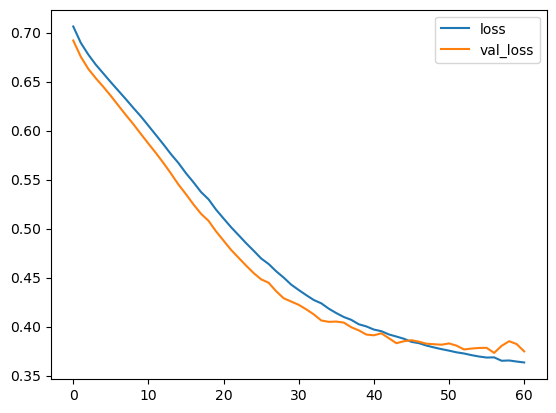

In [477]:
losses.plot()

In [478]:
from sklearn.metrics import confusion_matrix, classification_report

In [479]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [480]:
predictions = (predictions > 0.5).astype('int32')

In [481]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [482]:
print(confusion_matrix(y_test, predictions))

[[26  3]
 [ 7 25]]
